# Cutting plane method aka localisatoin method

Really an alternative to subgradient method. Generally a bit more expensive but in some cases (which?) can work better. Can handle differentiable and non-differentiable problems providing the oracle is implemented to return the subgradient rather than gradient. 

Begin by initalising an LP and solving with CVXPY 

In [460]:
import numpy as np
import cvxpy as cp

def random_piecewise_affine(m=100, n=20):
    """
    f(x) = max(a_1^T x + b_1, ... , a_m^T x + b_m)
    convex, non-differntiable piecewise affine function
    """
    A = np.random.normal(0, 1, size=(m, n))
    b = np.random.uniform(0, 1, size=(m))
    c = -A.T @ np.random.uniform(0, 1, size=(m)) 
    return A, b, c



# ? not actually doing what wnat 
# np.random.seed(1)

# m=100
# n=20

# A, b, c = random_piecewise_affine()

# x = cp.Variable(n)
# obj = cp.Minimize(cp.max(A @ x - b))
# # constraints = [A @ x <= b]
# problem = cp.Problem(obj)
# problem.solve()
# optimal_point = x.value
# optimal_point
# problem.value

Define the subgradient function

## Max volume ellipsoid

Optimisation problem to find largest ellipsoid contained in a polyhedron defined by a number of hyper planes

In [455]:


    
def maximum_volume_ellipsoid(polyhedron):
    '''
    Given polyhedron, find the maximum volume ellipsoid. This is 
    the largest ellipsoid contained within the polyhedron. 
    
    
    
    Size of ellipsoid is proportional to det B 
    
    the square roots of the eigenvalues of B are the lengths of the semi-axes of the ellipsoid 
    '''
    polyhedron = np.array(polyhedron)
    n = 20 # polyhedron.shape[1]
    B = cp.Variable((n,n), PSD=True)
    d = cp.Variable(n)

    contraints = []
    for i in range(len(polyhedron)):
        contraints.append(cp.norm(B @ polyhedron[i], 2)  + polyhedron[i].T @ d <= b[i]) # + polyhedron[i].T @ d 
        
    
    obj = cp.Minimize(-cp.log_det(B))
    problem = cp.Problem(obj, contraints)
    return problem.solve(), B.value, d.value
    
    # B defines the ellisoid, take the center

    
    

Text(0.5, 1.0, 'largest ellipsoid in polyhedron')

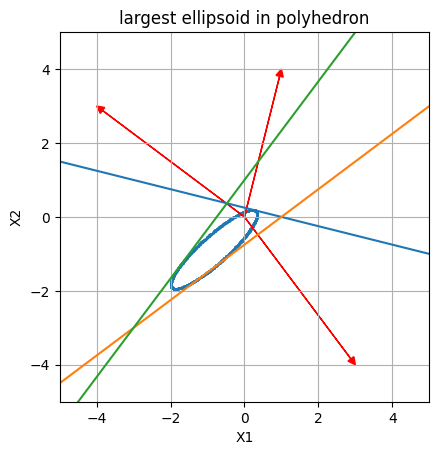

In [431]:
# Init test problem 
A = [[1,4], 
     [3,-4], 
     [-4,3]]
b = [1,3, 3]

# RUn max volume ellpsoid program
value, B, d = maximum_volume_ellipsoid(A)

# plot hyperplanes defining polyhedron, then ellipsoid
u = np.random.randn(2, 1000) 
u = u / np.linalg.norm(u, 2, axis=0)
u_ = (B @ u) + np.array([d for _ in range(1000)]).T
fig, ax = plt.subplots()
ax.scatter(*u_ , s=1)
for a_, b_ in zip(A,b):
    plot_hyperplane(ax, a_, b_)
ax.set_title('largest ellipsoid in polyhedron')

## Cutting plane w max ellipsoid

In [466]:
# linear const : [a in Rn, b in Rn] 

import jax 

def objective(x_k):
    return np.max(A @ x_k - b)
    
    
def cutting_plane_oracle(x):
    subgradient = objective_grad(x)
    return False, subgradient 
    
    if x == optimal_point:
        return True, None 
    else:
        # evalueate sub gradient 
        subgradient = objective_grad(x)
        return False, subgradient 

objective_grad = jax.grad(objective)


m=100
n=20

A, b, c = random_piecewise_affine()



polyhedron = [] # list of linear constraints. 


k = 0 
history = []
for i in range(50):
    print(i)
    # choose a point x(k+1) in polydreon
    if polyhedron != []:
        value, B, d = maximum_volume_ellipsoid(polyhedron)
        x_k1 = d
    else:
        x_k1 = np.zeros(n)
    
    history.append(objective(x_k1))
    
    # query the cutting-plane oracle 
    stop, subgradient = cutting_plane_oracle(x_k1)
    
    if stop:
        break
    else:
        polyhedron.append(subgradient)
        
    k+=1 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


ValueError: x and y must have same first dimension, but have shapes (20,) and (50,)

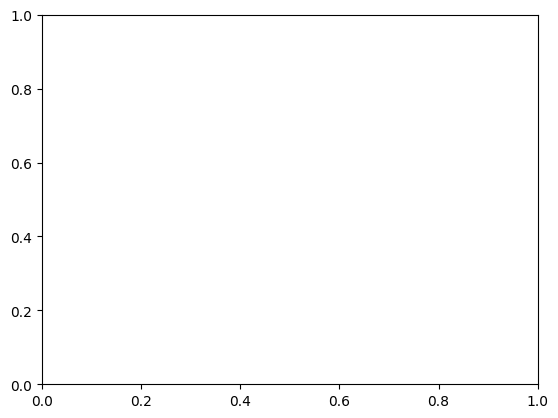

In [467]:
plt.plot(np.arange(20), history)

In [ ]:
history

In [ ]:
b